# Diabetic Retinopathy Detection

In [1]:
import cv2,os
data_path='dataset/'
categories=os.listdir(data_path)

labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'Mild': 0, 'Moderate': 1, 'No_DR': 2, 'Proliferate_DR': 3, 'Severe': 4}
['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']
[0, 1, 2, 3, 4]


In [2]:
img_size_x=224
img_size_y=224
data=[]
label=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
            resized=cv2.resize(gray,(img_size_x,img_size_y))
            data.append(resized)
            label.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

# Recale and assign  catagorical labels

In [3]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size_x,img_size_y,1))
label=np.array(label)
from tensorflow.keras.utils import to_categorical
new_label=to_categorical(label)

# CNN Model

In [4]:
data.shape

(3662, 224, 224, 1)

In [5]:
data.shape[1:]

(224, 224, 1)

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential([
    layers.Conv2D(8, (3,3), padding="valid", input_shape=(224,224,1), activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),
    
    layers.Conv2D(16, (3,3), padding="valid", activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),
    
    layers.Conv2D(32, (4,4), padding="valid", activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),
 
    layers.Flatten(),
    layers.Dense(32, activation = 'relu'),
    layers.Dropout(0.15),
    layers.Dense(5, activation = 'softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr = 1e-5), loss=tf.keras.losses.categorical_crossentropy, metrics=['acc'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 8)       80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 8)       0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 111, 111, 8)       32        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 16)        0         
 g2D)                                                            
                                                        

# Splitting data into traning and testing

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,new_label,test_size=0.1)

In [9]:
history=model.fit(x_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20



83/83 [==============================] - 29s 280ms/step - loss: 1.2632 - acc: 0.6047 - val_loss: 1.3150 - val_acc: 0.5083
Epoch 2/20
83/83 [==============================] - 21s 250ms/step - loss: 1.0249 - acc: 0.6673 - val_loss: 1.3203 - val_acc: 0.5099
Epoch 3/20
83/83 [==============================] - 21s 253ms/step - loss: 0.9466 - acc: 0.6798 - val_loss: 1.2451 - val_acc: 0.5068
Epoch 4/20
83/83 [==============================] - 28s 344ms/step - loss: 0.8845 - acc: 0.6897 - val_loss: 1.1624 - val_acc: 0.5918
Epoch 5/20
83/83 [==============================] - 21s 250ms/step - loss: 0.8780 - acc: 0.6961 - val_loss: 1.1085 - val_acc: 0.6388
Epoch 6/20
83/83 [==============================] - 20s 243ms/step - loss: 0.8516 - acc: 0.6988 - val_loss: 0.9670 - val_acc: 0.6995
Epoch 7/20
83/83 [==============================] - 22s 260ms/step - loss: 0.8007 - acc: 0.7128 - val_loss: 0.9634 - val_acc: 0.6980
Epoch 8/20
83/83 [==============================] - 32s 384ms/step - loss: 0.770

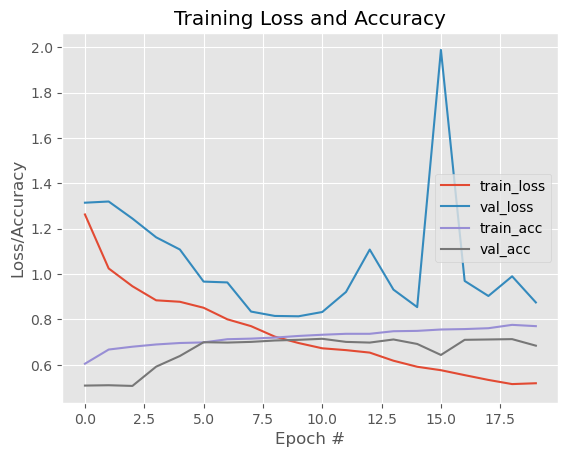

In [10]:
import matplotlib.pyplot as plt

# # plot the training loss and accuracy
N = 20 #number of epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")

In [11]:
model.save('model.h5')

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [3]:
import numpy as np
from keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
import cv2

dic = {0 : 'Mild', 1 : 'Moderate', 2 : 'No_DR', 3 : 'Prolliferate_DR', 4 : 'Severe'}

img_size_x=224
img_size_y=224
model = load_model('model.h5')

def predict_label(img_path):
    img=cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
    resized=cv2.resize(gray,(img_size_x,img_size_y)) 
    i = img_to_array(resized)/255.0
    i = i.reshape(1,img_size_x,img_size_y,1)
    predict_x=model.predict(i) 
    p=np.argmax(predict_x,axis=1)
    return dic[p[0]]

img_path= "C:\\DataSet\\archive\\ddb1_v02_01\\images\\diaretdb1_image067.png"
p = predict_label(img_path)
print(p)

1/1 [==============================] - 0s 234ms/step
Moderate
